In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
df = pd.read_csv("Loan Data.csv")

In [141]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [142]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [143]:
df.shape

(614, 13)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [145]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

### Data Cleaing and Filling

<Axes: >

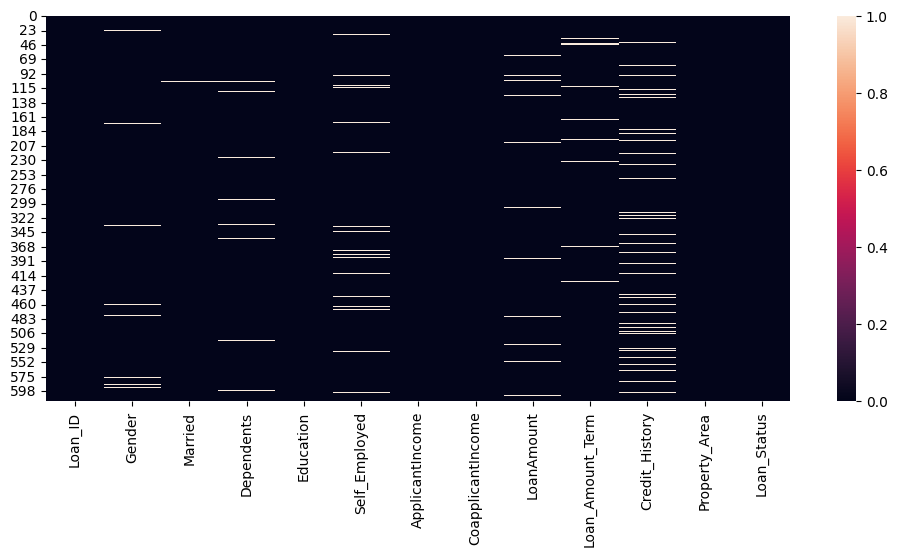

In [146]:
plt.figure(figsize=(12, 5))
sns.heatmap(df.isnull())

In [147]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [148]:
df["Credit_History"].median()

1.0

In [149]:
df["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [150]:
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].median())

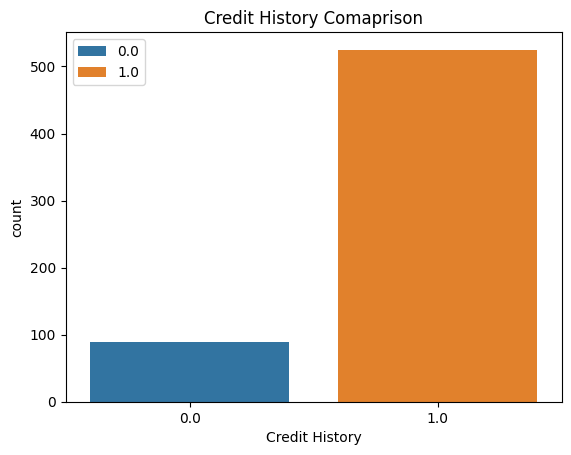

In [151]:
sns.barplot(
    x=df["Credit_History"].unique(),
    y=df["Credit_History"].value_counts(),
    hue=df["Credit_History"].unique(),
)
plt.title("Credit History Comaprison")
plt.xlabel("Credit History")
plt.show()

In [152]:
df["Credit_History"].value_counts()

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

In [153]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [154]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

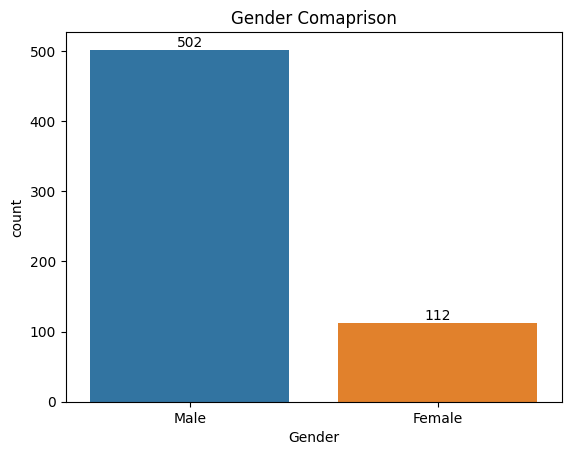

In [155]:
val = df["Gender"].value_counts()
sns.barplot(
    x=df["Gender"].unique(), y=df["Gender"].value_counts(), hue=df["Gender"].unique()
)
plt.title("Gender Comaprison")
plt.xlabel("Gender")
for index, value in enumerate(val):
    plt.text(index, value, str(value), ha="center", va="bottom")
# plt.legend(df['Gender'].unique())
plt.show()

In [156]:
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [157]:
df["Self_Employed"].mode()

0    No
Name: Self_Employed, dtype: object

In [158]:
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_16664\3013255708.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)


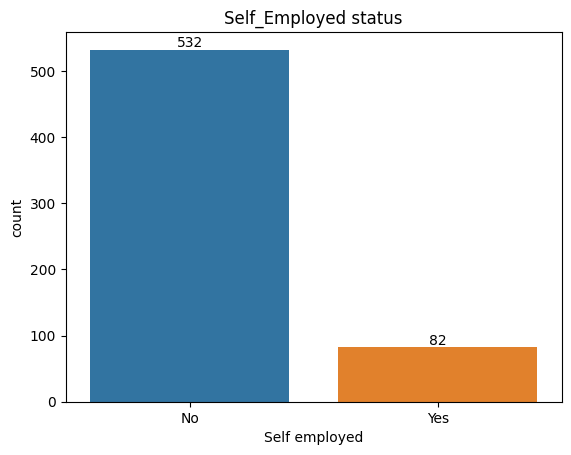

In [159]:
val = df["Self_Employed"].value_counts()
sns.barplot(
    x=df["Self_Employed"].unique(),
    y=df["Self_Employed"].value_counts(),
    hue=df["Self_Employed"].unique(),
)
plt.title("Self_Employed status")
plt.xlabel("Self employed")
for index, value in enumerate(val):
    plt.text(index, value, str(value), ha="center", va="bottom")
plt.show()

In [160]:
df["Self_Employed"].value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

In [161]:
df["LoanAmount"].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

C:\Users\admin\AppData\Local\Temp\ipykernel_16664\3845664682.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["LoanAmount"])


<Axes: xlabel='LoanAmount', ylabel='Density'>

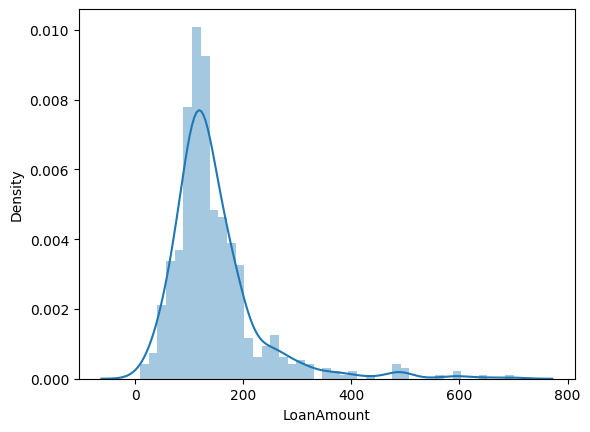

In [162]:
sns.distplot(df["LoanAmount"])

In [163]:
df["LoanAmount"].median()

128.0

In [164]:
df["LoanAmount"].mean()

146.41216216216216

In [165]:
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

In [166]:
df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [167]:
df["Married"].value_counts().sort_values()

Married
No     213
Yes    398
Name: count, dtype: int64

In [168]:
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

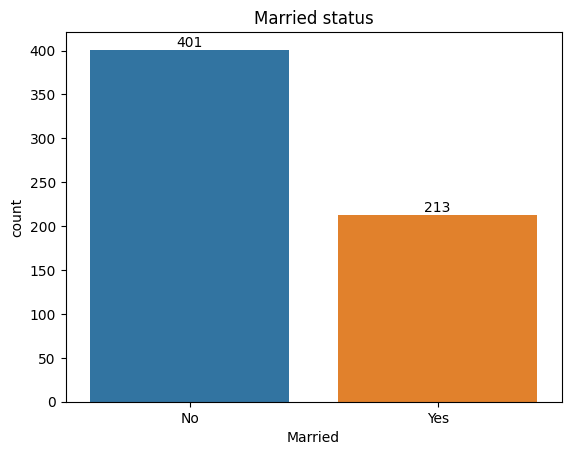

In [169]:
val = df["Married"].value_counts()
sns.barplot(
    x=df["Married"].unique(), y=df["Married"].value_counts(), hue=df["Married"].unique()
)
plt.title("Married status")
plt.xlabel("Married")
for index, value in enumerate(val):
    plt.text(index, value, str(value), ha="center", va="bottom")
plt.show()

In [170]:
df["Married"].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

In [171]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [172]:
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_16664\2562224200.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Loan_Amount_Term"])


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

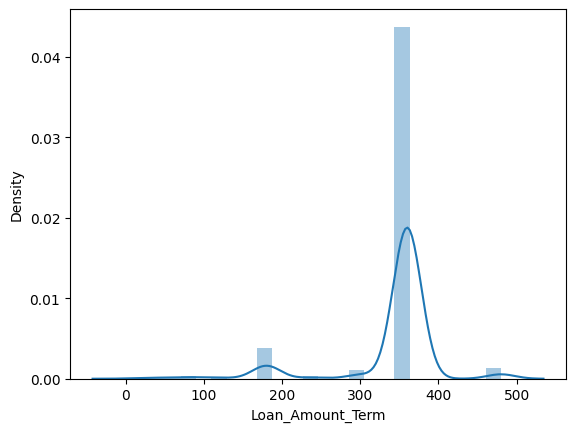

In [173]:
sns.distplot(df["Loan_Amount_Term"])

In [174]:
df["Loan_Amount_Term"].mean()

342.0

In [175]:
df["Loan_Amount_Term"].median()

360.0

In [176]:
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

In [177]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [178]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [179]:
df["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [180]:
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

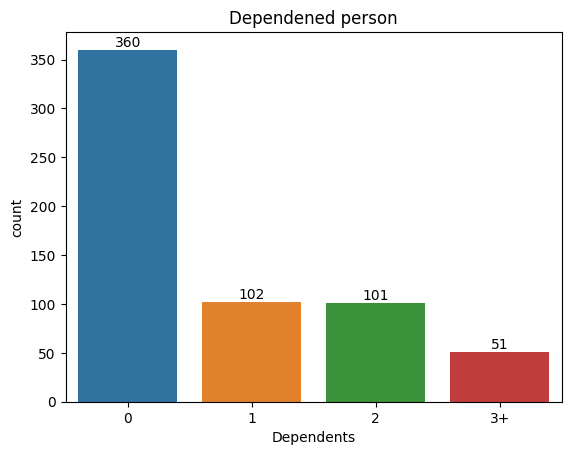

In [181]:
val = df["Dependents"].value_counts()
sns.barplot(
    x=df["Dependents"].unique(),
    y=df["Dependents"].value_counts(),
    hue=df["Dependents"].unique(),
)
plt.title("Dependened person")
plt.xlabel("Dependents")
for index, value in enumerate(val):
    plt.text(index, value, str(value), ha="center", va="bottom")

In [182]:
df["Dependents"].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [183]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

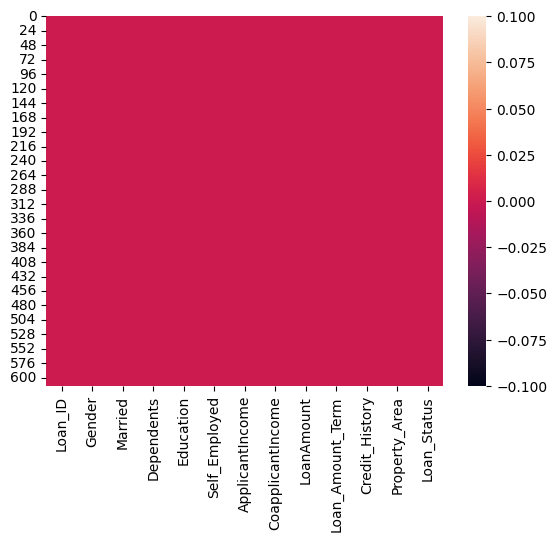

In [184]:
sns.heatmap(df.isnull())

### Find that Outliers is find our Data or not

In [185]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Text(0.5, 1.0, 'Loan Amount Data Range')

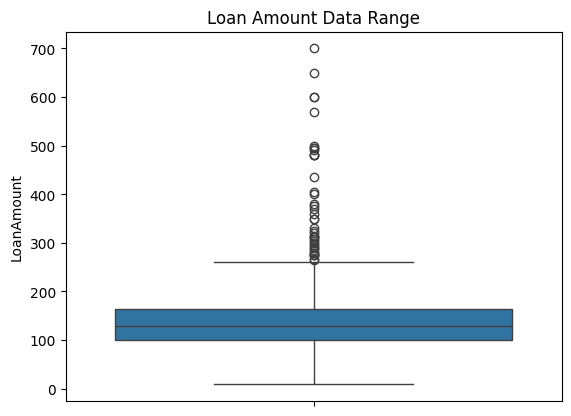

In [187]:
sns.boxplot(df["LoanAmount"])
plt.title("Loan Amount Data Range")

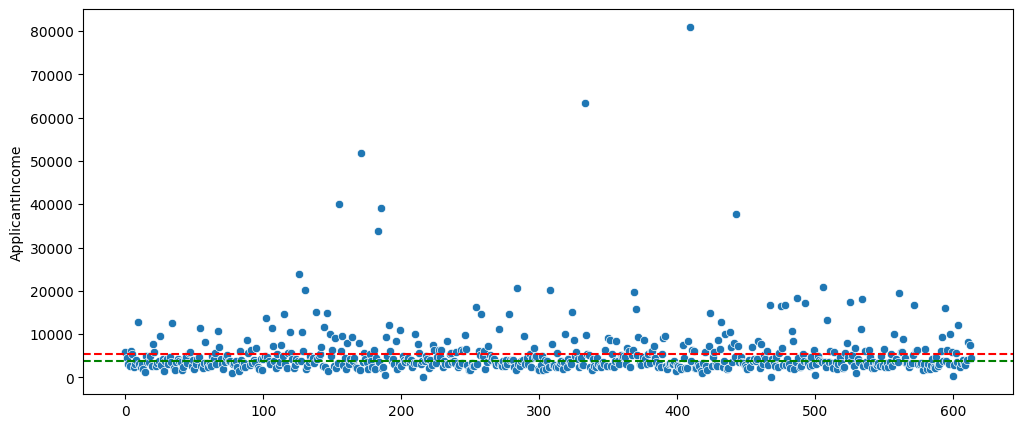

In [188]:
plt.figure(figsize=(12, 5))
sns.scatterplot(df["ApplicantIncome"])
plt.axhline(y=df["ApplicantIncome"].mean(), color="red", linestyle="--")
plt.axhline(y=df["ApplicantIncome"].median(), color="green", linestyle="--")

Text(0.5, 1.0, 'Applicant Income Range')

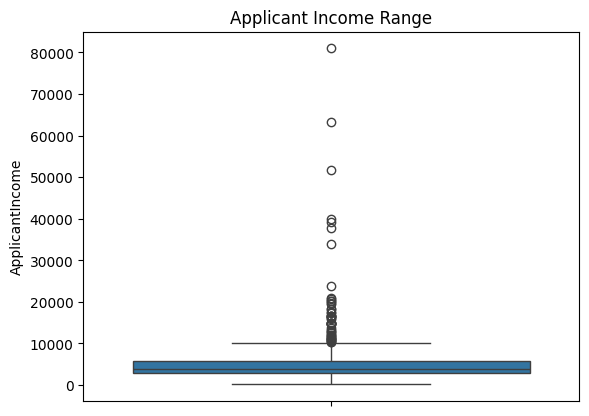

In [189]:
sns.boxplot(df["ApplicantIncome"])
plt.title("Applicant Income Range")

Text(0.5, 1.0, 'Co-applicant Income Range')

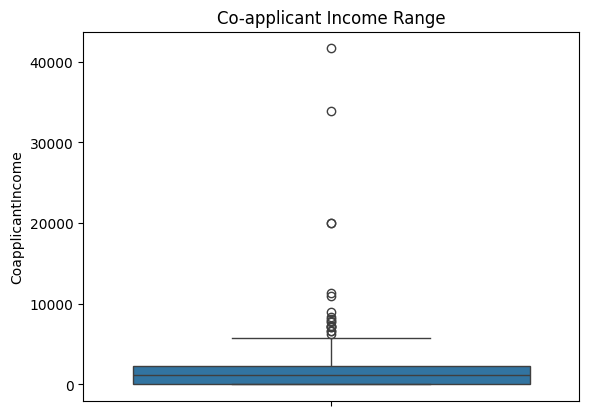

In [190]:
sns.boxplot(df["CoapplicantIncome"])
plt.title("Co-applicant Income Range")

In [191]:
def check_ouliers(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lw = q1 - (1.5 * iqr)
    up = q3 + (1.5 * iqr)
    return lw, up

In [192]:
lw, up = check_ouliers("LoanAmount")

In [193]:
lw, up

(3.5, 261.5)

In [194]:
df["LoanAmount"] = df["LoanAmount"].apply(
    lambda x: lw if x < lw else (up if x > up else x)
)

Text(0.5, 1.0, 'Loan Amount Data Range')

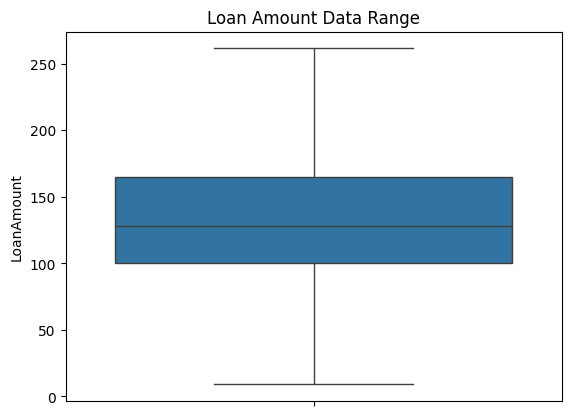

In [195]:
sns.boxplot(df["LoanAmount"])
plt.title("Loan Amount Data Range")

In [196]:
lw, up = check_ouliers("ApplicantIncome")

In [197]:
df["ApplicantIncome"] = df["ApplicantIncome"].apply(
    lambda x: lw if x < lw else (up if x > up else x)
)

Text(0.5, 1.0, 'Applicant Income Range')

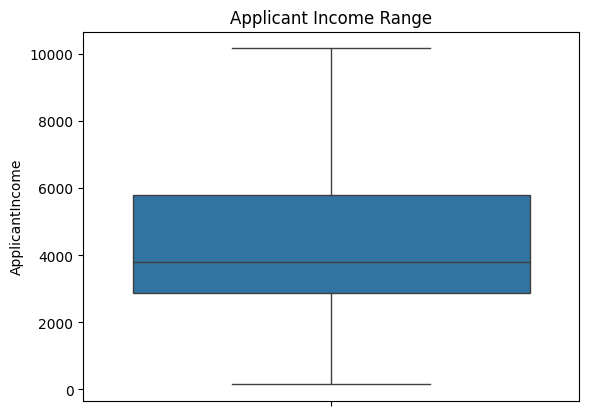

In [198]:
sns.boxplot(df["ApplicantIncome"])
plt.title("Applicant Income Range")

In [199]:
lw, up = check_ouliers("CoapplicantIncome")

In [200]:
df["CoapplicantIncome"] = df["CoapplicantIncome"].apply(
    lambda x: lw if x < lw else (up if x > up else x)
)

Text(0.5, 1.0, 'Co-applicant Income Range')

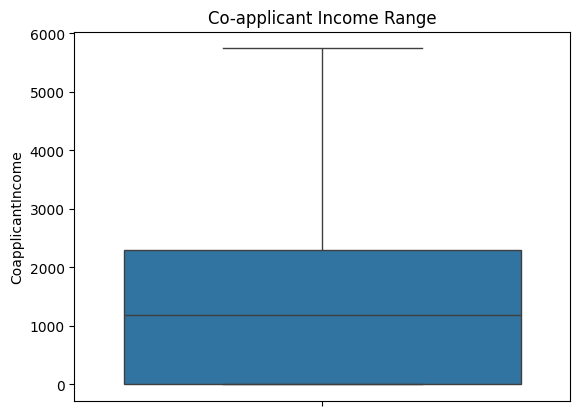

In [201]:
sns.boxplot(df["CoapplicantIncome"])
plt.title("Co-applicant Income Range")

### Data analysis


### To check the Eduation

In [202]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [203]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [204]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [205]:
df["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Text(0.5, 1.0, 'Applicant Educated or Not')

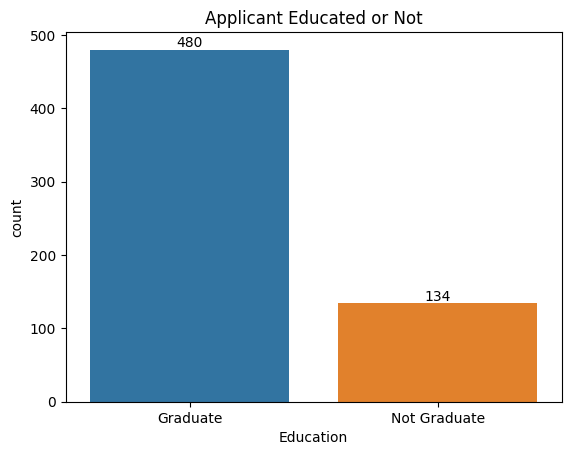

In [206]:
val = df["Education"].value_counts()
sns.barplot(
    x=df["Education"].unique(),
    y=df["Education"].value_counts(),
    hue=df["Education"].unique(),
)
for index, value in enumerate(val):
    plt.text(index, value, str(value), ha="center", va="bottom")
plt.xlabel("Education")
plt.title("Applicant Educated or Not")

In [207]:
sorted(df["Property_Area"].unique())

['Rural', 'Semiurban', 'Urban']

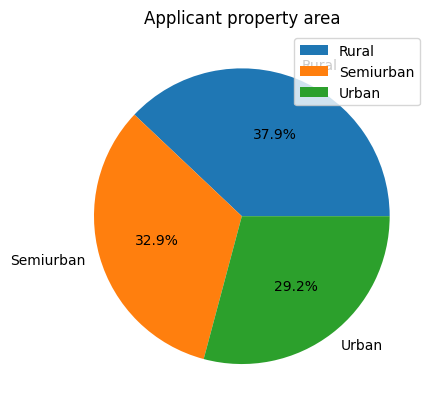

In [208]:
plt.pie(
    df["Property_Area"].value_counts(),
    labels=sorted(df["Property_Area"].unique()),
    autopct="%.1f%%",
)


plt.legend()


plt.title("Applicant property area")


plt.show()

In [209]:
df["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

### analysis

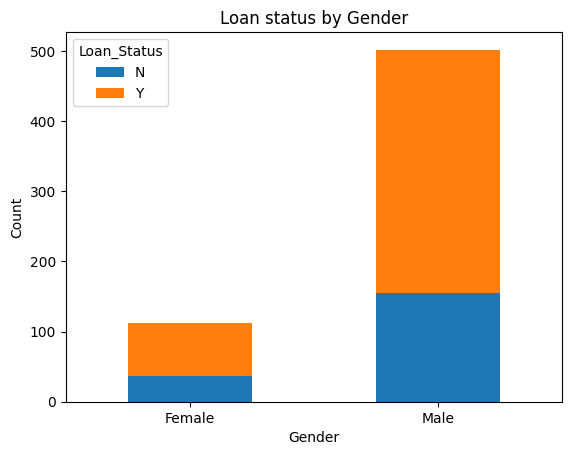

In [210]:
# val= df['Gender'].value_counts()
df.groupby(["Gender", "Loan_Status"]).size().unstack().plot(kind="bar", stacked=True)
plt.xticks(rotation="horizontal")
plt.ylabel("Count")
plt.title("Loan status by Gender")
# for index, value in enumerate(val):
#     #  print(value)
# plt.text(index, value, str(value), ha="center", va="bottom")

plt.show()

In [211]:
df["Gender"].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [212]:
df[(df["Loan_Status"] == "Y") & (df["Gender"] == "Male")]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,261.5,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2,Not Graduate,No,3987.0,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232.0,1950.0,108.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y


In [213]:
df[(df["Loan_Status"] == "Y") & (df["Gender"] == "Female")]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
29,LP001087,Female,No,2,Graduate,No,3750.00,2083.0,120.0,360.0,1.0,Semiurban,Y
37,LP001112,Female,Yes,0,Graduate,No,3667.00,1459.0,144.0,360.0,1.0,Semiurban,Y
45,LP001137,Female,No,0,Graduate,No,3410.00,0.0,88.0,360.0,1.0,Urban,Y
49,LP001151,Female,No,0,Graduate,No,4000.00,2275.0,144.0,360.0,1.0,Semiurban,Y
50,LP001155,Female,Yes,0,Not Graduate,No,1928.00,1644.0,100.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,LP002813,Female,Yes,1,Graduate,Yes,10171.25,0.0,261.5,360.0,1.0,Semiurban,Y
582,LP002894,Female,Yes,0,Graduate,No,3166.00,0.0,36.0,360.0,1.0,Semiurban,Y
587,LP002917,Female,No,0,Not Graduate,No,2165.00,0.0,70.0,360.0,1.0,Semiurban,Y
604,LP002959,Female,Yes,1,Graduate,No,10171.25,0.0,261.5,360.0,1.0,Semiurban,Y


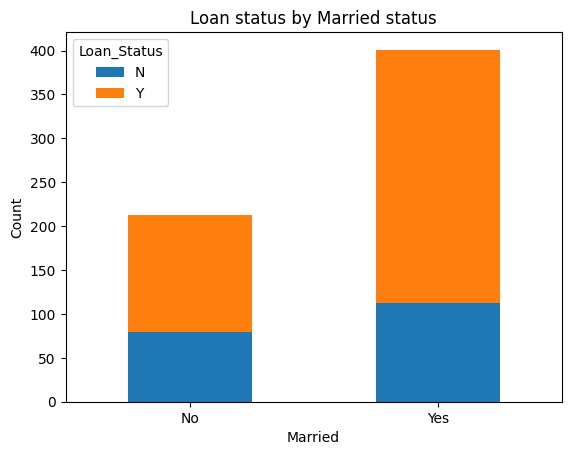

In [214]:
df.groupby(["Married", "Loan_Status"]).size().unstack().plot(kind="bar", stacked=True)
plt.xticks(rotation="horizontal")
plt.ylabel("Count")
plt.title("Loan status by Married status")

plt.show()

In [215]:
df["Married"].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

In [216]:
df[(df["Loan_Status"] == "Y") & (df["Married"] == "No")].shape

(134, 13)

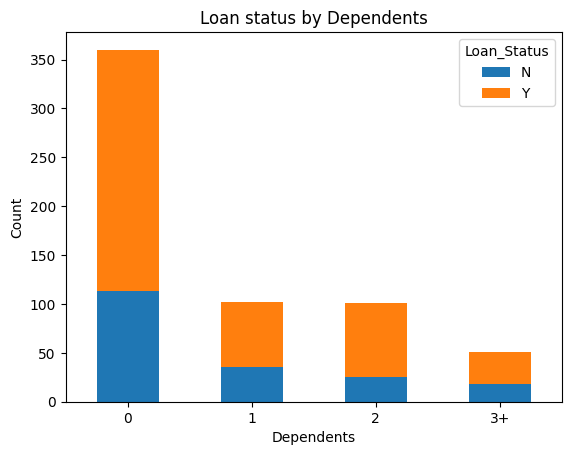

In [217]:
df.groupby(["Dependents", "Loan_Status"]).size().unstack().plot(
    kind="bar", stacked=True
)
plt.xticks(rotation="horizontal")
plt.ylabel("Count")
plt.title("Loan status by Dependents")
plt.show()

In [218]:
df["Dependents"].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [219]:
df[(df["Loan_Status"] == "Y") & (df["Dependents"] == "0")]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,LP002945,Male,Yes,0,Graduate,Yes,9963.0,0.0,180.0,360.0,1.0,Rural,Y
601,LP002950,Male,Yes,0,Not Graduate,No,2894.0,2792.0,155.0,360.0,1.0,Rural,Y
603,LP002958,Male,No,0,Graduate,No,3676.0,4301.0,172.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232.0,1950.0,108.0,360.0,1.0,Rural,Y


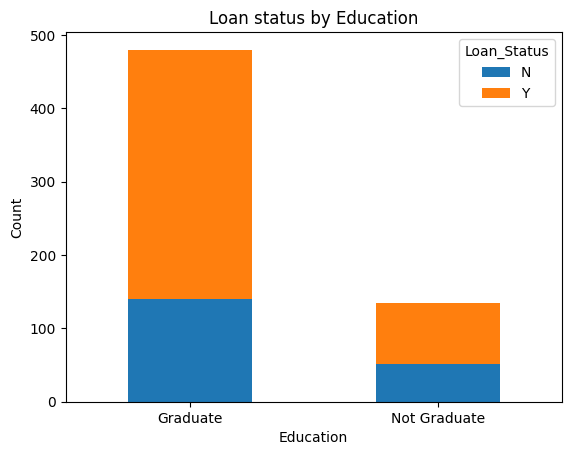

In [220]:
df.groupby(["Education", "Loan_Status"]).size().unstack().plot(kind="bar", stacked=True)
plt.xticks(rotation="horizontal")
plt.ylabel("Count")
plt.title("Loan status by Education")
plt.show()

In [221]:
df["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [222]:
df[(df["Loan_Status"] == "Y") & (df["Education"] == "Not Graduate")]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596.0,0.0,100.0,240.0,1.0,Urban,Y
27,LP001073,Male,Yes,2,Not Graduate,No,4226.0,1040.0,110.0,360.0,1.0,Urban,Y
39,LP001116,Male,No,0,Not Graduate,No,3748.0,1668.0,110.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,LP002833,Male,Yes,0,Not Graduate,No,4467.0,0.0,120.0,360.0,1.0,Rural,Y
587,LP002917,Female,No,0,Not Graduate,No,2165.0,0.0,70.0,360.0,1.0,Semiurban,Y
595,LP002940,Male,No,0,Not Graduate,No,3833.0,0.0,110.0,360.0,1.0,Rural,Y
601,LP002950,Male,Yes,0,Not Graduate,No,2894.0,2792.0,155.0,360.0,1.0,Rural,Y


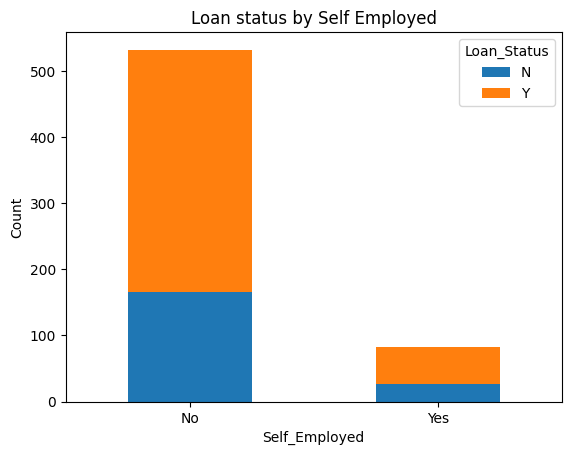

In [223]:
df.groupby(["Self_Employed", "Loan_Status"]).size().unstack().plot(
    kind="bar", stacked=True
)
plt.xticks(rotation="horizontal")
plt.ylabel("Count")
plt.title("Loan status by Self Employed")
plt.show()

In [224]:
df["Self_Employed"].value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

In [225]:
df[(df["Loan_Status"] == "Y") & (df["Self_Employed"] == "Yes")].shape

(56, 13)

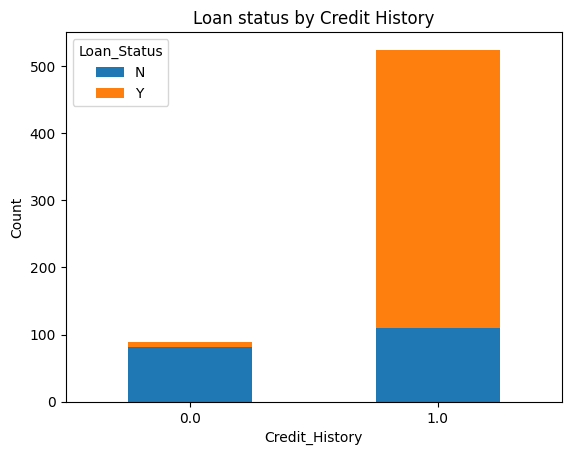

In [226]:
df.groupby(["Credit_History", "Loan_Status"]).size().unstack().plot(
    kind="bar", stacked=True
)
plt.xticks(rotation="horizontal")
plt.ylabel("Count")
plt.title("Loan status by Credit History")
plt.show()

In [227]:
df["Credit_History"].value_counts()

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

In [228]:
df[(df["Loan_Status"] == "Y") & (df["Credit_History"] == 0.0)].shape

(7, 13)

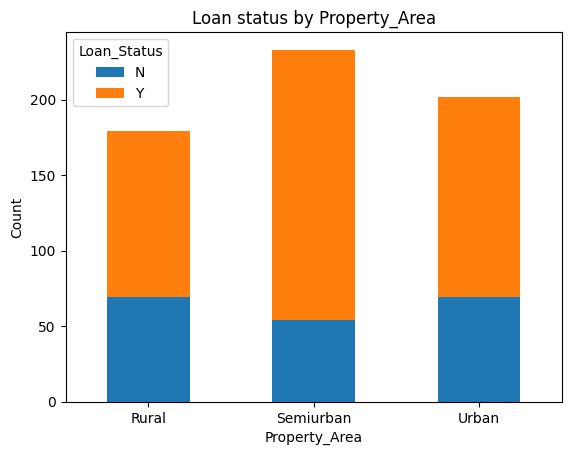

In [229]:
df.groupby(["Property_Area", "Loan_Status"]).size().unstack().plot(
    kind="bar", stacked=True
)
plt.xticks(rotation="horizontal")
plt.ylabel("Count")
plt.title("Loan status by Property_Area")
plt.show()

In [230]:
df["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [231]:
df[(df["Loan_Status"] == "Y") & (df["Property_Area"] == "Rural")].shape

(110, 13)

In [232]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [233]:
# df[["Gender", "ApplicantIncome", "CoapplicantIncome"]].sample(20)

In [234]:
male = df[df["Gender"] == "Male"]
female = df[df["Gender"] == "Female"]

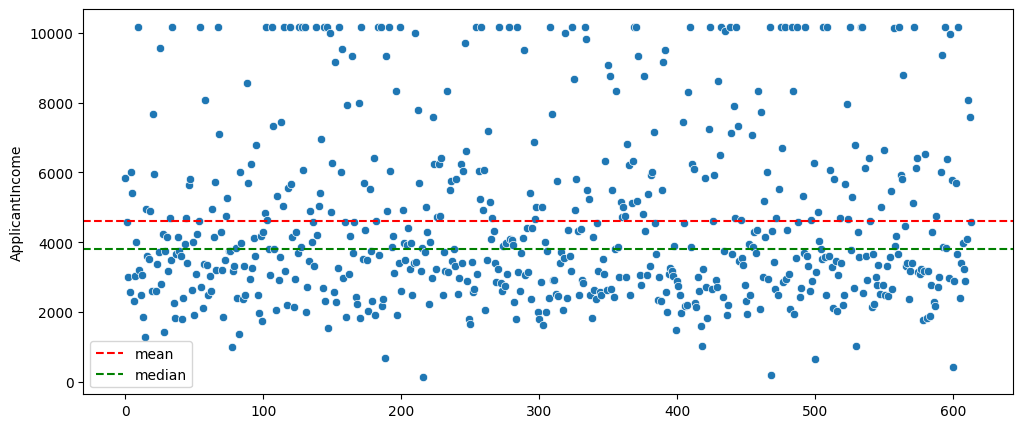

In [235]:
plt.figure(figsize=(12, 5))
sns.scatterplot(df["ApplicantIncome"])
plt.axhline(y=df["ApplicantIncome"].mean(), color="red", linestyle="--", label="mean")
plt.axhline(
    y=df["ApplicantIncome"].median(), color="green", linestyle="--", label="median"
)
plt.legend()
plt.show()

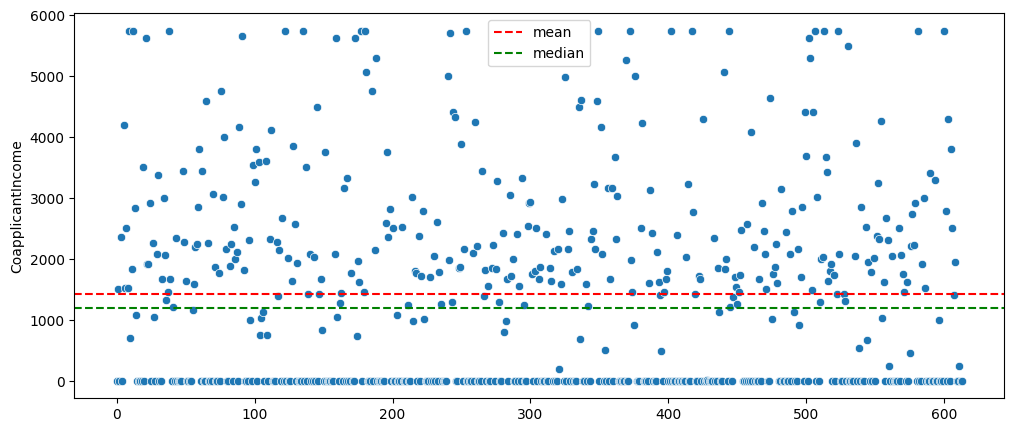

In [236]:
plt.figure(figsize=(12, 5))
sns.scatterplot(df["CoapplicantIncome"])
plt.axhline(y=df["CoapplicantIncome"].mean(), color="red", linestyle="--", label="mean")
plt.axhline(
    y=df["CoapplicantIncome"].median(), color="green", linestyle="--", label="median"
)
plt.legend()
plt.show()

In [237]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [238]:
df["Male"] = df["Gender"].apply(lambda x: 1 if x == "Male" else 0)

In [239]:
df["Married"].unique()

array(['No', 'Yes'], dtype=object)

In [240]:
df["Married_yes"] = df["Married"].apply(lambda x: 1 if x == "Yes" else 0)

In [241]:
df["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [242]:
df["Dependents_0"] = df["Dependents"].apply(lambda x: 1 if x == "0" else 0)

In [243]:
df["Dependents_1"] = df["Dependents"].apply(lambda x: 1 if x == "1" else 0)

In [244]:
df["Dependents_2"] = df["Dependents"].apply(lambda x: 1 if x == "2" else 0)

In [245]:
df["Dependents_3+"] = df["Dependents"].apply(lambda x: 1 if x == "3+" else 0)

In [246]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [247]:
df["Graduate"] = df["Education"].apply(lambda x: 1 if x == "Graduate" else 0)

In [248]:
df["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [249]:
df["Self_Employed_Yes"] = df["Self_Employed"].apply(lambda x: 1 if x == "Yes" else 0)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Male               614 non-null    int64  
 14  Married_yes        614 non-null    int64  
 15  Dependents_0       614 non-null    int64  
 16  Dependents_1       614 non

In [251]:
df["Credit_History"].unique()

array([1., 0.])

In [252]:
df["Credit_History_yes"] = df["Credit_History"].apply(lambda x: 1 if x == 1 else 0)

In [253]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [254]:
df["Urban"] = df["Property_Area"].apply(lambda x: 1 if x == "Urban" else 0)

In [255]:
df["Rural"] = df["Property_Area"].apply(lambda x: 1 if x == "Rural" else 0)

In [256]:
df["Semiurban"] = df["Property_Area"].apply(lambda x: 1 if x == "Semiurban" else 0)

In [257]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Graduate,Self_Employed_Yes,Credit_History_yes,Urban,Rural,Semiurban
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,...,1,0,0,0,1,0,1,1,0,0
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,...,0,1,0,0,1,0,1,0,1,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,...,1,0,0,0,1,1,1,1,0,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,...,1,0,0,0,0,0,1,1,0,0
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,...,1,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,...,1,0,0,0,1,0,1,0,1,0
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,...,0,0,0,1,1,0,1,0,1,0
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,...,0,1,0,0,1,0,1,1,0,0
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,...,0,0,1,0,1,0,1,1,0,0


In [258]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Male', 'Married_yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Graduate', 'Self_Employed_Yes', 'Credit_History_yes',
       'Urban', 'Rural', 'Semiurban'],
      dtype='object')

In [259]:
df.drop(
    columns=[
        "Loan_ID",
        "Gender",
        "Married",
        "Dependents",
        "Education",
        "Self_Employed",
        "Credit_History",
        "Property_Area",
    ],
    inplace=True,
)

In [260]:
df.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Male,Married_yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Graduate,Self_Employed_Yes,Credit_History_yes,Urban,Rural,Semiurban
0,5849.0,0.0,128.0,360.0,Y,1,0,1,0,0,0,1,0,1,1,0,0
1,4583.0,1508.0,128.0,360.0,N,1,1,0,1,0,0,1,0,1,0,1,0


### Classification

In [261]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [262]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Male,Married_yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Graduate,Self_Employed_Yes,Credit_History_yes,Urban,Rural,Semiurban
0,5849.0,0.0,128.0,360.0,Y,1,0,1,0,0,0,1,0,1,1,0,0
1,4583.0,1508.0,128.0,360.0,N,1,1,0,1,0,0,1,0,1,0,1,0
2,3000.0,0.0,66.0,360.0,Y,1,1,1,0,0,0,1,1,1,1,0,0
3,2583.0,2358.0,120.0,360.0,Y,1,1,1,0,0,0,0,0,1,1,0,0
4,6000.0,0.0,141.0,360.0,Y,1,0,1,0,0,0,1,0,1,1,0,0


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ApplicantIncome     614 non-null    float64
 1   CoapplicantIncome   614 non-null    float64
 2   LoanAmount          614 non-null    float64
 3   Loan_Amount_Term    614 non-null    float64
 4   Loan_Status         614 non-null    object 
 5   Male                614 non-null    int64  
 6   Married_yes         614 non-null    int64  
 7   Dependents_0        614 non-null    int64  
 8   Dependents_1        614 non-null    int64  
 9   Dependents_2        614 non-null    int64  
 10  Dependents_3+       614 non-null    int64  
 11  Graduate            614 non-null    int64  
 12  Self_Employed_Yes   614 non-null    int64  
 13  Credit_History_yes  614 non-null    int64  
 14  Urban               614 non-null    int64  
 15  Rural               614 non-null    int64  
 16  Semiurba

In [264]:
df.iloc[:, [0, 1]].columns

Index(['ApplicantIncome', 'CoapplicantIncome'], dtype='object')

In [265]:
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Loan_Status', 'Male', 'Married_yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Graduate', 'Self_Employed_Yes', 'Credit_History_yes', 'Urban', 'Rural',
       'Semiurban'],
      dtype='object')

In [266]:
x = df[
    [
        "ApplicantIncome",
        "CoapplicantIncome",
        "LoanAmount",
        "Loan_Amount_Term",
        "Male",
        "Married_yes",
        "Dependents_0",
        "Dependents_1",
        "Dependents_2",
        "Dependents_3+",
        "Graduate",
        "Self_Employed_Yes",
        "Credit_History_yes",
        "Urban",
        "Rural",
        "Semiurban",
    ]
]

In [267]:
y = df["Loan_Status"]

In [268]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=50
)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ApplicantIncome     614 non-null    float64
 1   CoapplicantIncome   614 non-null    float64
 2   LoanAmount          614 non-null    float64
 3   Loan_Amount_Term    614 non-null    float64
 4   Loan_Status         614 non-null    object 
 5   Male                614 non-null    int64  
 6   Married_yes         614 non-null    int64  
 7   Dependents_0        614 non-null    int64  
 8   Dependents_1        614 non-null    int64  
 9   Dependents_2        614 non-null    int64  
 10  Dependents_3+       614 non-null    int64  
 11  Graduate            614 non-null    int64  
 12  Self_Employed_Yes   614 non-null    int64  
 13  Credit_History_yes  614 non-null    int64  
 14  Urban               614 non-null    int64  
 15  Rural               614 non-null    int64  
 16  Semiurba

In [270]:
sc = StandardScaler()

In [271]:
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Loan_Status', 'Male', 'Married_yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Graduate', 'Self_Employed_Yes', 'Credit_History_yes', 'Urban', 'Rural',
       'Semiurban'],
      dtype='object')

In [275]:

x_train = sc.fit_transform(x_train)

In [276]:
x_test= sc.transform(x_test)

In [277]:
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Loan_Status', 'Male', 'Married_yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Graduate', 'Self_Employed_Yes', 'Credit_History_yes', 'Urban', 'Rural',
       'Semiurban'],
      dtype='object')

In [278]:
classifier = LogisticRegression()

In [279]:
classifier.fit(x_train, y_train)

LogisticRegression()

In [281]:
y_pred = classifier.predict(x_test)

In [282]:
y_pred

array(['Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [283]:
cm = confusion_matrix(y_pred, y_test)

In [284]:
cm

array([[19,  2],
       [24, 78]], dtype=int64)

In [285]:
accuracy_score(y_pred, y_test)

0.7886178861788617

In [286]:
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Loan_Status', 'Male', 'Married_yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Graduate', 'Self_Employed_Yes', 'Credit_History_yes', 'Urban', 'Rural',
       'Semiurban'],
      dtype='object')

In [287]:
new_data = pd.DataFrame(
    {
        "ApplicantIncome": [60000],
        "CoapplicantIncome": [0],
        "LoanAmount": [20000],
        "Loan_Amount_Term": [256],
        "Male": [0],
        "Married_yes": [0],
        "Dependents_0": [1],
        "Dependents_1": [0],
        "Dependents_2": [0],
        "Dependents_3+": [0],
        "Graduate": [1],
        "Self_Employed_Yes": [0],
        "Credit_History_yes": [1],
        "Urban": [1],
        "Rural": [0],
        "Semiurban": [0],
    }
)

In [288]:
# nw = pd.DataFrame({"ApplicantIncome": [60000],
#         "CoapplicantIncome": [0],
#         "LoanAmount": [20000],
#         "Loan_Amount_Term": [256],
#         "Gender":'Male',
#         "Married":"No",
#         "Dependents":"1",
#         "Education":"Graduate",
#         "Self_Employed":"No",
#         "Credit_History":1,
#         "Property_Area":"Urban"
#         })

In [289]:
predicted_loan_status = classifier.predict(new_data)
predicted_loan_status

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array(['Y'], dtype=object)

In [ ]:
import pickle as pkl

In [ ]:
pkl.dump(sc, open("scalr.pkl", "wb"))

In [ ]:
pkl.dump(classifier, open("model.pkl", "wb"))